# Predicting Survival Person On The Titanic Ship
* This notebook will help us to predict what was the survial rate of the person on the Titanic ship using the available data features and given label. By comparing feature variable with label variable we will predict the survival rate.
* For this purpose we will be using classification algorith i.e. logistic algorithm as our study is to predict either they survived or not.




# Problem Definition
> In our given problem, we will be exploring the binary classification weather the passesnger has survived or not
* Given all the parameters about the passengers, can we predict wheather they will survive or not?

In [9]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [10]:
titanic_data = pd.read_csv('titanic.csv')

In [11]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


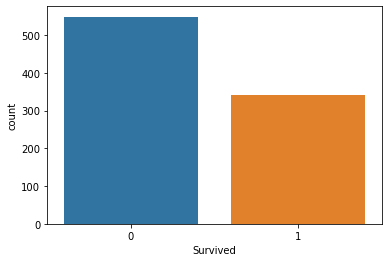

In [16]:
sns.countplot(x="Survived",data=titanic_data);

* From this countplot we can predict that around 550 of the passengers didnot survived and around 330 person only survived on the ship.From
* from this we can analyze that there are more number of dead passengers than those who survived

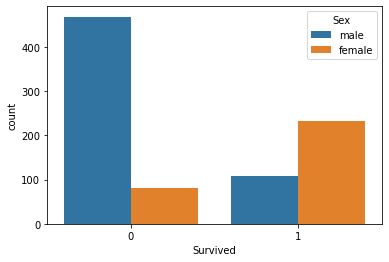

In [20]:
sns.countplot(x="Survived",hue="Sex",data=titanic_data);

* Here we can analyze that most of the male died on that incident.We can even predict that dead case of male was three times than that of female

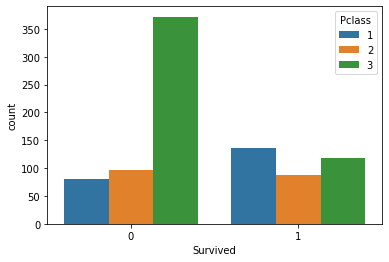

In [22]:
sns.countplot(x="Survived",hue="Pclass",data=titanic_data);

> Here it is clear that the passengers who died more are from third class passengers and who survived are from first class

# Lets clean our data i.e. to see weather or not there is any null value, if there is a null value we will truncat it or fill it with missing value

In [24]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* From this data we can see that Age column has 177 null values and similary Cabin and Embarked has 687 and 2 null values respectively
* In fact for our analysis lets prune the Cabin column, we don't need it for now

In [25]:
titanic_data.drop('Cabin',axis=1,inplace=True)

In [26]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [27]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

* Lets drop missing na from Age column

In [28]:
titanic_data.dropna(inplace=True)

In [30]:
titanic_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

> Ah, now we don't have any missing value but we can see that we have still string value, so whenever we are working with machine learning we have to make sure that there is no any string value

In [32]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

> Lets change all the string will numbers using dummies

In [33]:
sex = pd.get_dummies(titanic_data['Sex'],drop_first=True)

In [34]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
885,0
886,1
887,0
889,1


* Here we dropped female as from male data only we can predict for female case i.e. if male is 0 that means it is male

In [35]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [36]:
embark = pd.get_dummies(titanic_data['Embarked'],drop_first=True)

In [37]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
885,1,0
886,0,1
887,0,1
889,0,0


In [38]:
pcl = pd.get_dummies(titanic_data['Pclass'],drop_first=True)

In [39]:
pcl

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
885,0,1
886,1,0
887,0,0
889,0,0


> The same case goes for Embark and Pcl as well, we just need some of the data to predict others

# Now lets concatenate all the new columns to the dataset using pandas

In [41]:
titanic_data = pd.concat([titanic_data,sex,embark,pcl],axis=1)

In [42]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


# Ah it looks good, for now we don't need all the columns so lets remove the columns that we don't need anymore

In [43]:
titanic_data.drop(['Sex','Age','Name','PassengerId','Ticket'],axis=1,inplace=True)

In [44]:
titanic_data.head()

,Survived,Pclass,SibSp,Parch,Fare,Embarked,male,Q,S,2,3
0,0,3,1,0,7.2500,S,1,0,1,0,1
1,1,1,1,0,71.2833,C,0,0,0,0,0
2,1,3,0,0,7.9250,S,0,0,1,0,1
3,1,1,1,0,53.1000,S,0,0,1,0,0
4,0,3,0,0,8.0500,S,1,0,1,0,1


In [45]:
titanic_data.dtypes

Survived      int64
Pclass        int64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
male          uint8
Q             uint8
S             uint8
2             uint8
3             uint8
dtype: object

> Oh sorry lets prune that Embarked also since we dont want any sting data anymore

In [46]:
titanic_data.drop(['Embarked'],axis=1,inplace=True)

In [58]:
titanic_data.head()

,Survived,Pclass,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,1,0,7.2500,1,0,1,0,1
1,1,1,1,0,71.2833,0,0,0,0,0
2,1,3,0,0,7.9250,0,0,1,0,1
3,1,1,1,0,53.1000,0,0,1,0,0
4,0,3,0,0,8.0500,1,0,1,0,1


In [59]:
titanic_data.dtypes

Survived      int64
Pclass        int64
SibSp         int64
Parch         int64
Fare        float64
male          uint8
Q             uint8
S             uint8
2             uint8
3             uint8
dtype: object

>Alright now we have all our data in numbers and this is what we need to work out with our data in machine learning..Lets now use scikit learn one of the most beautiful machine learning algorithm to use model

In [60]:
#Split our data into X and y(i.e. splitting data into feature and labels)
np.random.seed(42)
X = titanic_data.drop('Survived',axis=1)
y = titanic_data['Survived']

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [63]:
lg = LogisticRegression()
# here lg is just the instance of LogisticRegression class

In [65]:
lg.fit(X_train,y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
lg.score(X_test,y_test)

0.7777777777777778

In [67]:
print(f'The accuracy that the passengers who did survived on the ship is:{lg.score(X_test,y_test)*100:.2f}%')

The accuracy that the passengers who did survived on the ship is:77.78%


In [68]:
y_preds = lg.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)


0.7777777777777778

# So, from our study we analyzed that there is around 78% chance that the passengers in the ship would have been survived according to our given data